# MPCS 51042-2 Midterm 1 Review
## Oct 26, 2017

# We'll discuss topics in two contexts

## Implemementing functions with state
* Generators
* lambdas
* Factory functions (closures)
* Decorators
* Plain-old Classes

## Managing attributes
* Just need to know `property` for midterm
* *Don't need to know these:*
  * `__getattr__`, `__setattr__`, and `__getattribute__`
  * Descriptors

# Example problem: a basic 1D random walk

This simulates a quantity (a stock's price, an object's position in space) that randomly moves up or down as time moves forward.  The implementation has:
* A starting state
* The current state
* A function for randomly sampling the next state based on the current state


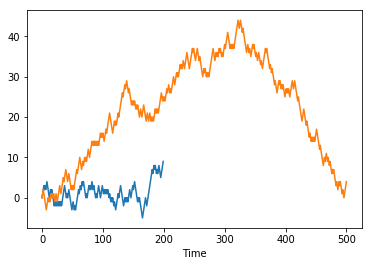

In [25]:
from random import choice
import matplotlib.pyplot as plt
import numpy as np

# The starting state
start = 0
# A random change (delta) in the state
deltaFunc = lambda: choice([-1,1])

# Generate a walk of 500 steps
walk = [start,]
for i in range(500):
    walk.append(walk[-1] + deltaFunc())
    
# Plot the walk 
plt.plot(walk)
plt.xlabel('Time')
plt.show()

# Implementing with a generator:

A good option if you want to simulate on-the-fly without storing the previous history extra data.  

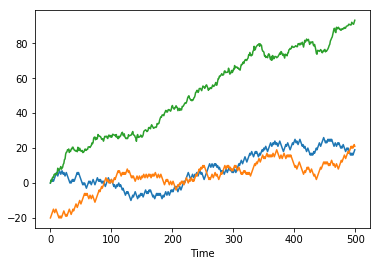

In [26]:
def walkGen(n, start=0, deltaFunc=None):
    if not deltaFunc:
        deltaFunc = lambda: choice([-1,1])
    state = start
    for i in range(n):
        yield state
        state += deltaFunc()
    
# Not the best examples, since plt.plot needs a sequence
plt.plot(list(walkGen(500)))
# Different starting point
plt.plot(list(walkGen(500, start=-20)))
# A random walk with drift
plt.plot(list(walkGen(500, deltaFunc = lambda: np.random.normal(.2))))
plt.xlabel('Time')
plt.show()

# Implementing with a Factory Function

A factory function is a function that returns another function.  With nonlocals, you can use it save a state.  

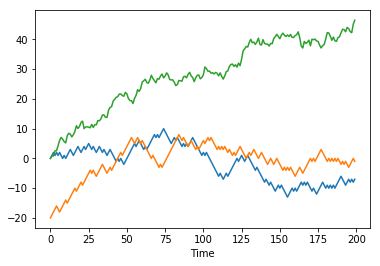

In [27]:
def walkFactory(start=0, deltaFunc=None):
    if not deltaFunc:
        deltaFunc = lambda: choice([-1,1])
    state = start
    def inner():
        nonlocal state
        lastState = state
        state += deltaFunc()
        return lastState
    return inner

walk = walkFactory()
walk20 = walkFactory(start=-20)
walkNorm = walkFactory(deltaFunc = lambda: np.random.normal(.2))

plt.plot([walk() for i in range(200)])
plt.plot([walk20() for i in range(200)])
plt.plot([walkNorm() for i in range(200)])
plt.xlabel('Time')
plt.show()

The same instance of a walkFatory can pick up where it left off!

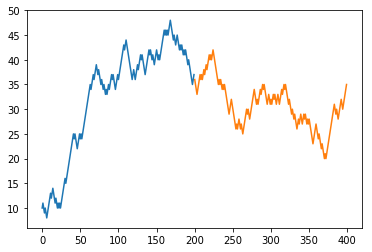

In [28]:
# A walk that starts at 20
walk10 = walkFactory(start=10)

plt.plot(
    [i for i in range(200)],
    [walk10() for i in range(200)],
)
plt.plot(
    [200 + i for i in range(200)], 
    [walk10() for i in range(200)]
)
plt.show()

# Decorators
A decorator is very similar to a function factory in that it is *also* a function that returns another function

``` Python
@decorate
def target():
    return3*x
    
# is equivalent to
def target(x):
    return 3*x
target = decorate(target)
```

Compare this to a factory function.  It is *very* close.  

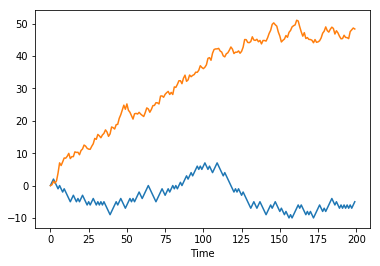

In [29]:
import matplotlib.pyplot as plt
from random import choice

def walkDec(deltaFunc):
    state = 0
    def inner():
        nonlocal state
        lastState = state
        state += deltaFunc()
        return lastState
    return inner

@walkDec
def walk():
    return choice([-1,1])

@walkDec
def walkNorm():
    return np.random.normal(0.2)

plt.plot([walk() for i in range(200)])
plt.plot([walkNorm() for i in range(200)])
plt.xlabel('Time')
plt.show()

# Packing and unpacking arguments

In [30]:
# args is packed in definition
def unspecArgs(a, b, *args):
    print(a)
    print(b)
    print(args)

# Case 1:  where you provide extra args
unspecArgs(1, 2, 3, 4)

# Case 2: Unpacking
mylist = [1,2,3,4]
unspecArgs(*mylist)

1
2
(3, 4)
1
2
(3, 4)


In [31]:
# Kwargs are packed into a dict
def unspecKeywords(a, b, **kwargs):
    print("a is {}".format(a))
    print("b is {}".format(b))
    print("kwargs is {}".format(kwargs))
    
unspecKeywords(foo=1, a=2, b=3, bar=4)

d = dict(a=1, b=2)
# d is unpacked into the args
unspecKeywords(**d)

a is 2
b is 3
kwargs is {'bar': 4, 'foo': 1}
a is 1
b is 2
kwargs is {}
